In [3]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# spambase_augmented = pd.read_csv('spambase_augmented.csv')

# #Shuffle the data
# spambase_augmented = spambase_augmented.sample(frac=1, random_state=42).reset_index(drop=True)

# training_data, testing_data = train_test_split(spambase_augmented, test_size=0.2, random_state=42)

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd


spambase_augmented = pd.read_csv('spambase_augmented.csv')

#Shuffle the data
spambase_augmented = spambase_augmented.sample(frac=1, random_state=42).reset_index(drop=True)

training_data, testing_data = train_test_split(spambase_augmented, test_size=0.2, random_state=42)
# Num folds
k = 5


#Ensemble list of number of estimators
ensemble = [150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400]

num_samples = training_data.shape[0]

features_folds = []

# Split the data into k folds
for i in range(k):
    features_folds.append(training_data.iloc[i * num_samples // k: (i + 1) * num_samples // k])


best_error = float('inf')
best_number_of_estimators = ensemble[0]

for number_of_estimators in ensemble:

    print("Number of estimators:", number_of_estimators)

    sum_error = 0
    average_error = 0

    for i in range(k):

        training_fold = pd.concat(features_folds[:i] + features_folds[i + 1:])
        testing_fold = features_folds[i]
        
        train_features = training_fold.drop(training_fold.columns[-1], axis=1)
        train_target = training_fold[training_fold.columns[-1]]

        test_features = testing_fold.drop(testing_fold.columns[-1], axis=1)
        test_target = testing_fold[testing_fold.columns[-1]]

        dt = DecisionTreeClassifier(max_depth=1)

        ada = AdaBoostClassifier(estimator=dt, n_estimators=number_of_estimators)

        ada.fit(train_features, train_target)

        predictions = ada.predict(test_features)

        accuracy = accuracy_score(test_target, predictions)

        error = 1 - accuracy

        sum_error = sum_error + error

    average_error = sum_error / k

    print("Average Error:", average_error)

    if average_error < best_error:
        print("New best error:", average_error)
        best_error = average_error
        best_number_of_estimators = number_of_estimators


print("Best number of estimators:", best_number_of_estimators)
print("Best error:", best_error)


Number of estimators: 150
Average Error: 0.0576086956521739
New best error: 0.0576086956521739
Number of estimators: 175
Average Error: 0.056793478260869557
New best error: 0.056793478260869557
Number of estimators: 200
Average Error: 0.05733695652173911
Number of estimators: 225
Average Error: 0.05733695652173913
Number of estimators: 250
Average Error: 0.057065217391304324
Number of estimators: 275
Average Error: 0.0581521739130435
Number of estimators: 300
Average Error: 0.0581521739130435
Number of estimators: 325
Average Error: 0.05733695652173913
Number of estimators: 350
Average Error: 0.055978260869565234
New best error: 0.055978260869565234
Number of estimators: 375
Average Error: 0.05624999999999998
Number of estimators: 400
Average Error: 0.054891304347826096
New best error: 0.054891304347826096
Best number of estimators: 400
Best error: 0.054891304347826096


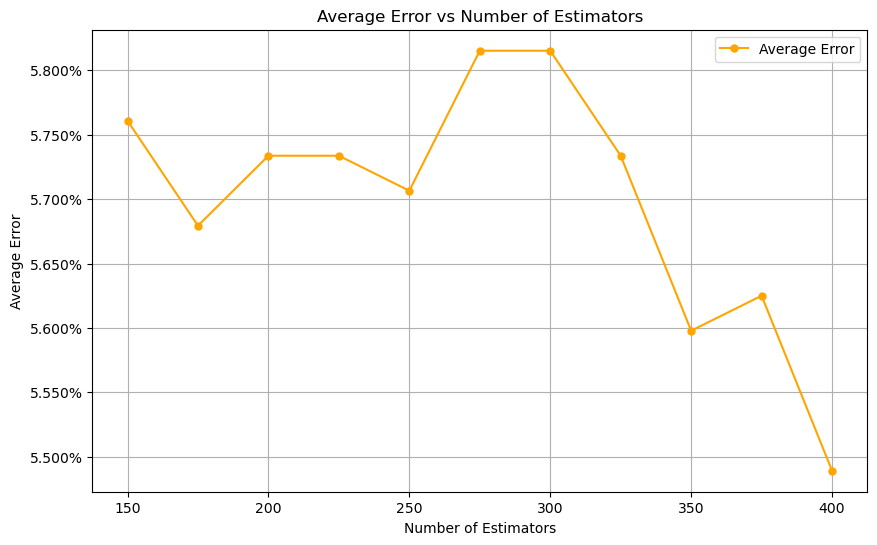

In [7]:
errors_estimators = [
    0.0576086956521739,
    0.056793478260869557,
    0.05733695652173911,
    0.05733695652173913,
    0.057065217391304324,
    0.0581521739130435,
    0.0581521739130435,
    0.05733695652173913,
    0.055978260869565234,
    0.05624999999999998,
    0.054891304347826096
]


import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def plot_accuracies_with_varying_number_of_trees(ensemble, errors, title):
    plt.figure(figsize=(10, 6))
    plt.plot(ensemble, errors, label='Average Error', linestyle='-', color='orange', marker='o', markersize=5)

    plt.title(title)
    plt.xlabel('Number of Estimators')
    plt.ylabel('Average Error')
    plt.legend()

    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))

    plt.grid(True)
    plt.show()


plot_accuracies_with_varying_number_of_trees(ensemble, errors_estimators, 'Average Error vs Number of Estimators')


## Testing on testing data

In [4]:
training_features = training_data.drop(training_data.columns[-1], axis=1)
training_target = training_data[training_data.columns[-1]]

testing_features = testing_data.drop(testing_data.columns[-1], axis=1)
testing_target = testing_data[testing_data.columns[-1]]

dt = DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(estimator=dt, n_estimators=best_number_of_estimators)

ada.fit(training_features, training_target)

y_pred = ada.predict(testing_features)

accuracy = accuracy_score(testing_target, y_pred)

error = 1 - accuracy

print("Error on testing data:", error)



Error on testing data: 0.05108695652173911


In [5]:
print(best_number_of_estimators)

400
